参考：
 [scikit-learn でクラスタ分析 (K-means 法)](https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means)

In [0]:
#numpyとpandasのインポート
import numpy as np
import pandas as pd

#KMeansとStandardScaler（標準化）メソッドのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [0]:
cust_df = pd.read_csv("/content/Wholesale_customers_data.csv")

In [3]:
 del(cust_df['Channel'])
 del(cust_df['Region'])
 cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [6]:
cust_array = np.array([cust_df['Fresh'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Grocery'].tolist(),
                       cust_df['Frozen'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Detergents_Paper'].tolist(),
                       cust_df['Delicassen'].tolist()
                       ], np.int32)
 
# 行列を転置
cust_array = cust_array.T
 
 # クラスタ分析を実行 (クラスタ数=4)
pred = KMeans(n_clusters=4).fit_predict(cust_array)
pred

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 3, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1,
       2, 1, 1, 3, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 3, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 3, 3, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,

In [7]:
cust_df['cluster_id']=pred
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,2


In [8]:
cust_df['cluster_id'].value_counts()

2    280
1     77
0     76
3      7
Name: cluster_id, dtype: int64

In [9]:
cust_df[cust_df['cluster_id']==0].mean() # クラスタ番号 = 0

Fresh               31363.868421
Milk                 4479.921053
Grocery              5863.052632
Frozen               5329.973684
Detergents_Paper     1117.434211
Delicassen           2128.342105
cluster_id              0.000000
dtype: float64

In [10]:
cust_df[cust_df['cluster_id']==1].mean() # クラスタ番号 = 1

Fresh                4962.688312
Milk                12868.870130
Grocery             19922.246753
Frozen               1689.363636
Detergents_Paper     8994.415584
Delicassen           1739.818182
cluster_id              1.000000
dtype: float64

In [11]:
cust_df[cust_df['cluster_id']==2].mean() # クラスタ番号 = 2

Fresh               7926.889286
Milk                3202.346429
Grocery             4351.989286
Frozen              2660.746429
Detergents_Paper    1318.103571
Delicassen          1035.278571
cluster_id             2.000000
dtype: float64

In [12]:
cust_df[cust_df['cluster_id']==3].mean() # クラスタ番号 = 3

Fresh               42117.285714
Milk                46046.142857
Grocery             42914.285714
Frozen              10211.714286
Detergents_Paper    17327.571429
Delicassen          12192.142857
cluster_id              3.000000
dtype: float64

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3')]

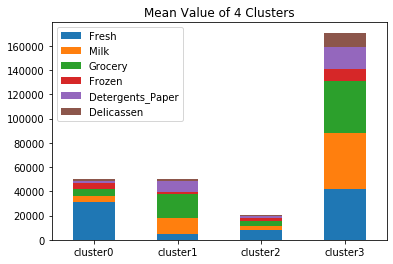

In [13]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)